In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv("tmp_res.res")
df.head()

,m,k,beta,gamma,no_test,mean,variance
0,20,5,0.1,0.1,1734,1.0,0.0
1,20,5,0.1,0.2,1734,1.0,0.0
2,20,5,0.1,0.3,1734,1.0,0.0
3,20,5,0.1,0.4,1734,1.0,0.0
4,20,5,0.1,0.5,1734,1.0,0.0


0.5 1.0 [2.37410368 0.08664003] 0.012163001362533626
0.6 0.8 [3.08544367 0.08574087] 0.010384660547517018
0.6 0.9 [2.74759619 0.15316157] 0.008205321516785245
0.6 1.0 [2.61970097 0.1782425 ] 0.0075677259731216995
0.7000000000000001 0.6 [4.08243183 0.05500054] 0.010454991574797583
0.7000000000000001 0.7000000000000001 [3.77327134 0.11753493] 0.006026635686501237
0.7000000000000001 0.8 [3.54206179 0.18113936] 0.006767411996811787
0.7000000000000001 0.9 [2.85840173 0.28367532] 0.006009154202514136
0.7000000000000001 1.0 [2.67851601 0.31506749] 0.005277905441253265
0.8 0.4 [4.8432387 0.0609842] 0.009899708937820955
0.8 0.5 [4.83825453 0.0926572 ] 0.006656071158370015
0.8 0.6 [4.32146928 0.16300105] 0.009417694262313172
0.8 0.7000000000000001 [3.93608666 0.2417709 ] 0.004189371373522581
0.8 0.8 [3.45373019 0.33820468] 0.004304304963861929
0.8 0.9 [2.65621806 0.46525525] 0.003064512223322728
0.8 1.0 [2.36228057 0.51118354] 0.004563976415311659
0.9 0.2 [5.50792384 0.09350327] 0.01032007039204

Text(0.02, 0.5, 'Average rounds to route')

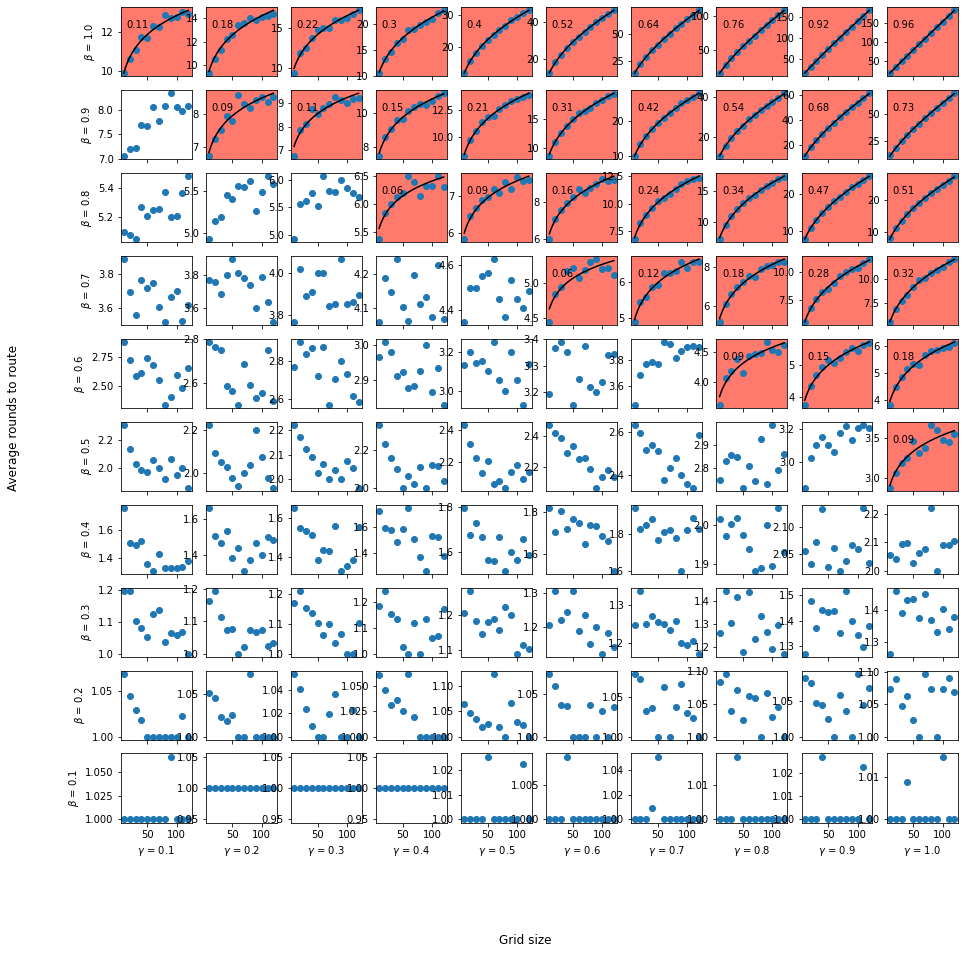

In [5]:
fig, ax = plt.subplots(10, 10, figsize=(15, 15), sharex=True, sharey=False)

betas = np.linspace(0.1, 1, 10)
gammas = np.linspace(0.1, 1, 10)
for i, beta in enumerate(betas):
    for j, gamma in enumerate(gammas):
        tmp_df = df[(df['beta'] == round(beta,1)) & (df['gamma'] == round(gamma,1))]
        ax[9-i][j].scatter(tmp_df['m'], tmp_df['mean'])

        if (i == 0):
            ax[9-i][j].set_xlabel('$\gamma$ = ' + f"{round(gamma, 1)}")
        if (j == 0):
            ax[9-i][j].set_ylabel('$\\beta$ = ' + f"{round(beta, 1)}")
        if (2*beta + gamma >= 2):
            ax[9-i][j].set_facecolor('xkcd:salmon')

            def fun(x, c, e):
                return c*x**e
            
            popt, pcov = curve_fit(fun, tmp_df['m'], tmp_df['mean'])
            ax[9-i][j].text(0.08, 0.7, round(popt[1], 2), transform=ax[9-i][j].transAxes)
            print(beta, gamma, popt, np.sqrt(np.diag(pcov))[1])
            xx = np.linspace(10, 120, 100)
            yy = fun(xx, *popt)
            ax[9-i][j].plot(xx, yy, c='k')
        # ax[i][j].set_yscale('log')
fig.supxlabel('Grid size')
fig.supylabel('Average rounds to route')

1 0 [11.68105795  0.08942768] 0.002813009803973817


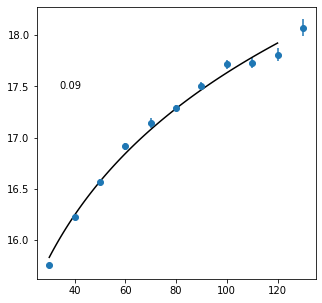

In [2]:
df = pd.read_csv("../results/k_5/independent_local.res")
df["std_err"] = np.sqrt(df["variance"]) / np.sqrt(df["no_test"])
df.head()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.errorbar(df['m'], df['mean'], df["std_err"], fmt="o")

def fun(x, c, e):
    return c*x**e
            
popt, pcov = curve_fit(fun, df['m'], df['mean'], sigma=np.sqrt(df["variance"]))
ax.text(0.08, 0.7, round(popt[1], 2), transform=ax.transAxes)
print("1", "0", popt, np.sqrt(np.diag(pcov))[1])
xx = np.linspace(30, 120, 100)
yy = fun(xx, *popt)
ax.plot(xx, yy, c='k')